#  Practical Data Preprocessing Task – Sales Dataset

##  Task Title:
**"Will This Sale Be Successful?"**

##  Objective:
You are provided with a real-world retail dataset. Your task is to **prepare the data for a machine learning classification model** that predicts whether a customer will purchase **more than 3 items in a single transaction**.

You will perform a complete preprocessing pipeline from data exploration to handling imbalances, with visualizations and clear justifications for each step.

---

##  Dataset Description:

Dataset link: [Customer Shopping Dataset – Retail Sales Data](https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset)

The dataset contains sales transactions from a retail environment with the following columns:

| Column Name       | Description                                                              |
|------------------|---------------------------------------------------------------------------|
| `invoice_no`      | Unique identifier for the invoice                                         |
| `customer_id`     | Unique identifier for each customer                                       |
| `gender`          | Gender of the customer (`Male`, `Female`)                                |
| `age`             | Age of the customer                                                      |
| `category`        | Category of the purchased product                                        |
| `quantity`        | Number of items purchased in the transaction                            |
| `price`           | Unit price of the product in Turkish Lira                                |
| `payment_method`  | Payment method used (e.g., `Cash`, `Credit Card`, `Debit Card`)         |
| `invoice_date`    | Date of the transaction                                                  |
| `shopping_mall`   | Name of the mall where the transaction occurred                         |

---

##  Task Instructions:

You must complete the following steps **in order**, and write clear explanations (in Markdown cells) alongside your code in a Jupyter Notebook.

### 1. Load & Explore the Data
- Load the dataset.
- Display first few rows and general information.
- Summary statistics of numerical and categorical features.
- Visualizations:
  - Histogram of `age`, `price`, and `quantity`.
  - Countplot for `gender`, `category`, and `payment_method`.

---

### 2. Clean the Data
- Remove duplicate records if any.
- Identify and remove/fix unrealistic values (e.g., negative or 0 prices, age outliers).
- Provide a rationale for cleaning decisions.

---

### 3. Handle Missing Data
- Check for missing values.
- Apply at least two different strategies to handle missing data:
  - Drop
  - Fill (e.g., with median, mode, etc.)
- Justify why each method was chosen.

---

### 4. Feature Engineering
- Create a new column: `total_spent = quantity * price`
- Create a new binary target column:
  - 1 if `quantity > 3`, otherwise 0
  - Name the new column `target`

---

### 5. Encode Categorical Variables
- Encode all applicable categorical features using suitable encoding techniques.
- Explain your choice (e.g., Label Encoding vs OneHot Encoding).

---

### 6. Detect & Handle Outliers
- Use visualizations (e.g., boxplots) to detect outliers in numerical columns like `age`, `price`, and `total_spent`.
- Apply IQR or another statistical method to handle outliers.

---

### 7. Feature Scaling
- Apply feature scaling to numerical columns like `age`, `price`, and `total_spent`.
- Use either `StandardScaler` or `MinMaxScaler`.
- Show distributions before and after scaling.

---

### 8. Train-Test Split
- Split the data into training and testing sets (80/20).
- Use `stratify=y` to preserve class distribution.

---

### 9. Deal with Imbalanced Classes
- Check class distribution of your `target` variable.
- If imbalanced, apply resampling techniques:
  - Random UnderSampling or SMOTE
- Show class distribution before and after resampling.

---
    
## Deliverables:
At the end of the session, you should submit:
- A complete Jupyter Notebook with:
  - Well-structured code
  - Clear explanations using Markdown
  - Visualizations embedded
- A short reflection answering:
  - What challenges did you face?
  - What did you learn from this task?
  - What would you do differently if the dataset was larger/messier?

---

## Hints:
- Clean code is important! Keep your notebook readable.
- Justify your preprocessing decisions.
- Label your visualizations properly.

---

> **Good luck! This is your chance to practice real-world data preparation and analysis.**


# Solution

## 1. Load and Explore data

In [1]:
import pandas as pd

df = pd.read_csv('customer_shopping_data.csv')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


### Checking data info

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


##### Noticed that there is no null values and some datatypes needs to be converted to integer like invoice_no, customer_id but needs removing the letter before them

### Checking statistics

In [3]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


### Visualizations

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Histogram for numeric columns

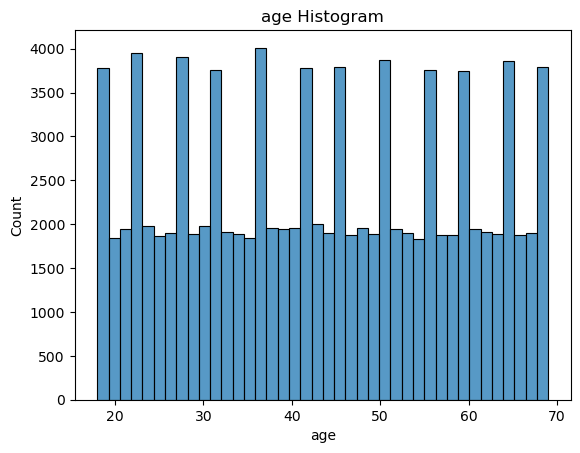

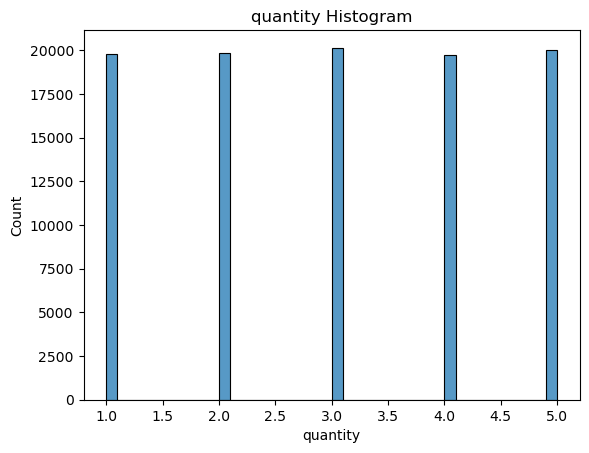

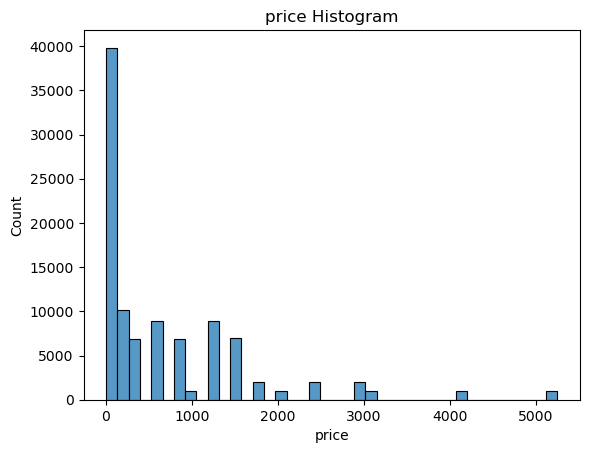

In [5]:
num_col = ['age', 'quantity', 'price']

for col in num_col:
    sns.histplot(df[col], bins=40)
    plt.title(f'{col} Histogram')
    plt.show()

##### Expicting outliers in the price column

#### count plot for categorial columns

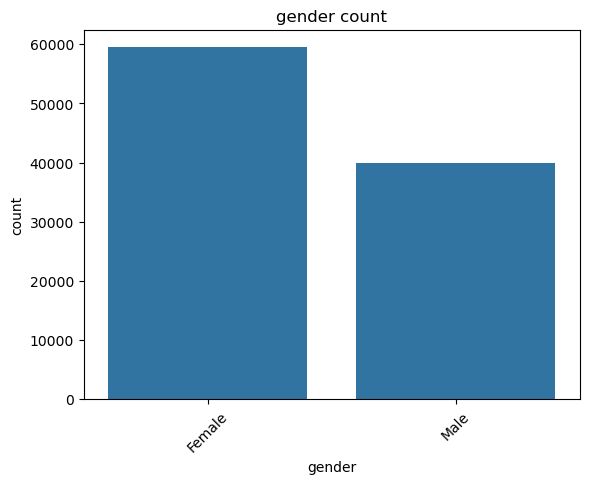

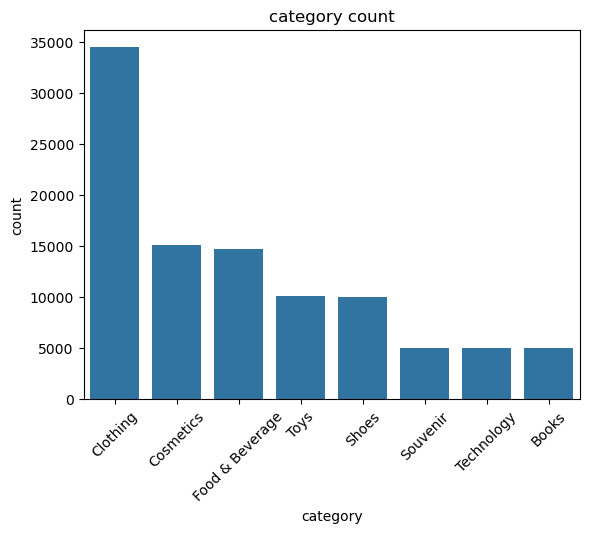

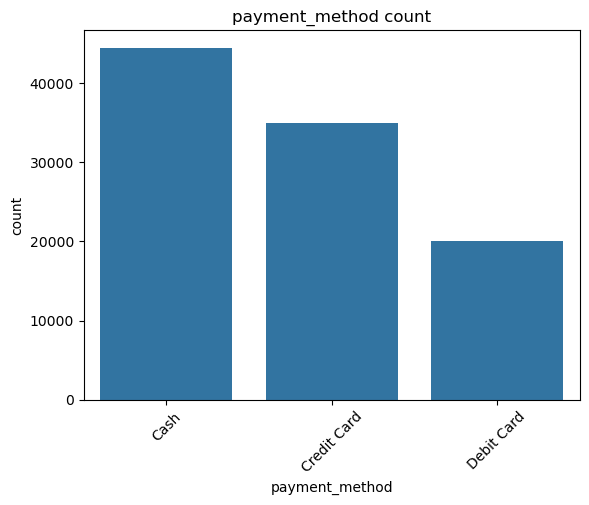

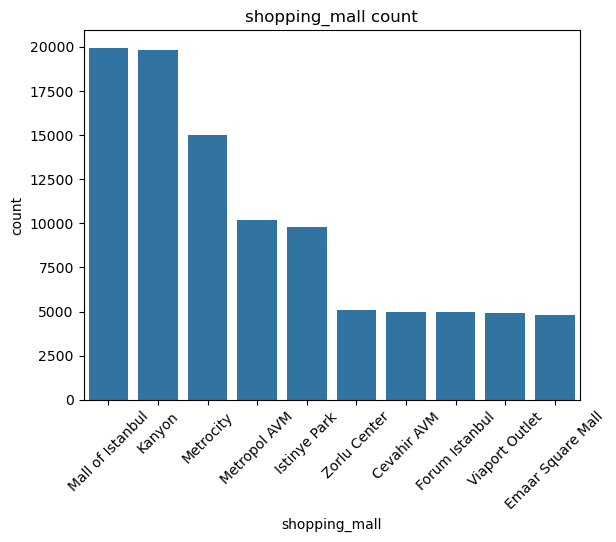

In [6]:
cat_col = ['gender', 'category', 'payment_method', 'shopping_mall']

for col in cat_col:
    plt.title(f'{col} count')
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)

    plt.show()

##### The result are realistic and now wierd values

## 2. Data cleaning

### checking for duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

##### no duplicates

### Checking for outliers


#### Checking age 

<Axes: xlabel='age'>

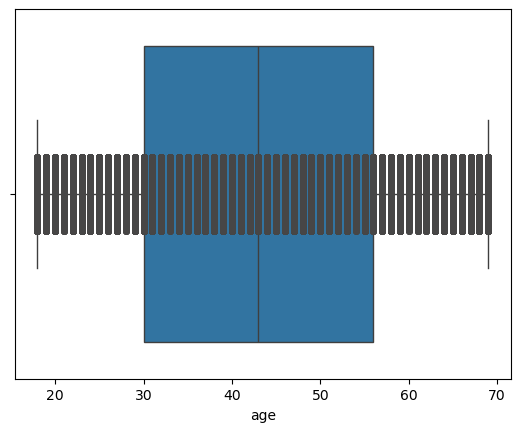

In [8]:
sns.boxplot(x='age', data=df)
sns.stripplot(x='age', data=df, color="#474646")


##### No outliers found

#### Checking quantity

<Axes: xlabel='quantity'>

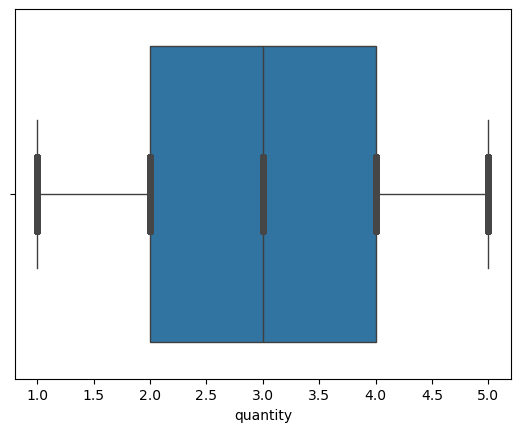

In [9]:
sns.boxplot(x='quantity', data=df)
sns.stripplot(x='quantity', data=df, color="#474646")


##### No outliers found

#### Checking price

<Axes: xlabel='price'>

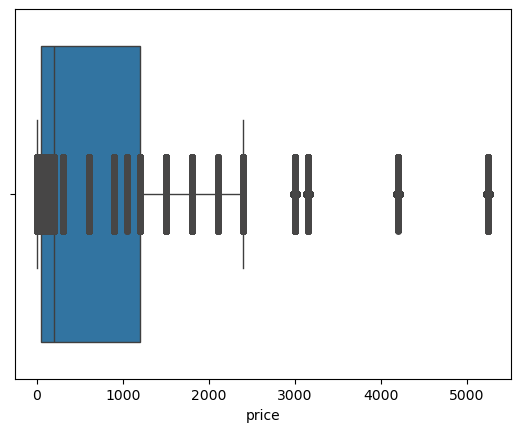

In [10]:
sns.boxplot(x='price', data=df)
sns.stripplot(x='price', data=df, color="#474646")


##### some outliers were found but i will taka a look at them

In [11]:
df[df['price'] > 3000].sample(20)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
94131,I149152,C138491,Female,18,Technology,5,5250.00,Credit Card,28/09/2022,Metropol AVM
48160,I327538,C203803,Male,66,Shoes,5,3000.85,Credit Card,25/06/2022,Kanyon
61474,I302634,C226491,Female,57,Shoes,5,3000.85,Debit Card,20/12/2022,Forum Istanbul
86161,I465536,C456798,Female,29,Technology,5,5250.00,Debit Card,23/12/2022,Mall of Istanbul
97182,I422030,C277551,Male,60,Technology,4,4200.00,Debit Card,11/12/2022,Metropol AVM
36600,I238701,C262225,Female,41,Technology,4,4200.00,Credit Card,18/08/2022,Emaar Square Mall
82641,I463430,C178218,Female,38,Technology,4,4200.00,Debit Card,29/12/2022,Metropol AVM
24615,I235578,C191360,Male,21,Technology,5,5250.00,Credit Card,24/05/2022,Metropol AVM
85896,I693098,C170097,Male,34,Technology,4,4200.00,Cash,19/10/2021,Istinye Park
56821,I170600,C173088,Male,40,Technology,5,5250.00,Cash,27/12/2022,Zorlu Center


##### Well i think that these prices are realistic so i won't change it

## 3. Handle Missing Data

### We found earlier that there were no missing data so this part is done

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


## 4. Feature Engineering

### Creating total spent column

In [13]:
df['total_spent'] = df['price'] * df['quantity']
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_spent
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00


### Creating the target column

In [15]:
df['target'] = df['quantity'].apply(lambda x: 1 if x > 3 else 0)
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_spent,target
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,1
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,0
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08,0
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,1
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25,1
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92,0
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92,0
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00,1
